In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
import pandas as pd

# Load the dataset
nba_data = pd.read_csv("NBA_2024_Shots.csv")

# Display the first few rows
nba_data.head()

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT
0,2024,2023-24,1610612764,Washington Wizards,1629673,Jordan Poole,G,SG,11-03-2023,22300003,...,In The Paint (Non-RA),Center,C,8-16 ft.,-0.4,17.45,12,1,11,1
1,2024,2023-24,1610612764,Washington Wizards,1630166,Deni Avdija,F,SF,11-03-2023,22300003,...,Above the Break 3,Center,C,24+ ft.,1.5,30.55,25,1,10,26
2,2024,2023-24,1610612764,Washington Wizards,1626145,Tyus Jones,G,PG,11-03-2023,22300003,...,Restricted Area,Center,C,Less Than 8 ft.,-3.3,6.55,3,1,9,46
3,2024,2023-24,1610612764,Washington Wizards,1629673,Jordan Poole,G,SG,11-03-2023,22300003,...,Restricted Area,Center,C,Less Than 8 ft.,-1.0,5.85,1,1,8,30
4,2024,2023-24,1610612764,Washington Wizards,1626145,Tyus Jones,G,PG,11-03-2023,22300003,...,Restricted Area,Center,C,Less Than 8 ft.,-0.0,6.25,1,1,8,8


In [4]:
# Check dataset info
nba_data.info()

# Check summary statistics
nba_data.describe()

# Check for missing values
nba_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218701 entries, 0 to 218700
Data columns (total 26 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEASON_1        218701 non-null  int64  
 1   SEASON_2        218701 non-null  object 
 2   TEAM_ID         218701 non-null  int64  
 3   TEAM_NAME       218701 non-null  object 
 4   PLAYER_ID       218701 non-null  int64  
 5   PLAYER_NAME     218701 non-null  object 
 6   POSITION_GROUP  217437 non-null  object 
 7   POSITION        217437 non-null  object 
 8   GAME_DATE       218701 non-null  object 
 9   GAME_ID         218701 non-null  int64  
 10  HOME_TEAM       218701 non-null  object 
 11  AWAY_TEAM       218701 non-null  object 
 12  EVENT_TYPE      218701 non-null  object 
 13  SHOT_MADE       218701 non-null  bool   
 14  ACTION_TYPE     218701 non-null  object 
 15  SHOT_TYPE       218701 non-null  object 
 16  BASIC_ZONE      218701 non-null  object 
 17  ZONE_NAME 

SEASON_1             0
SEASON_2             0
TEAM_ID              0
TEAM_NAME            0
PLAYER_ID            0
PLAYER_NAME          0
POSITION_GROUP    1264
POSITION          1264
GAME_DATE            0
GAME_ID              0
HOME_TEAM            0
AWAY_TEAM            0
EVENT_TYPE           0
SHOT_MADE            0
ACTION_TYPE          0
SHOT_TYPE            0
BASIC_ZONE           0
ZONE_NAME            0
ZONE_ABB             0
ZONE_RANGE           0
LOC_X                0
LOC_Y                0
SHOT_DISTANCE        0
QUARTER              0
MINS_LEFT            0
SECS_LEFT            0
dtype: int64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

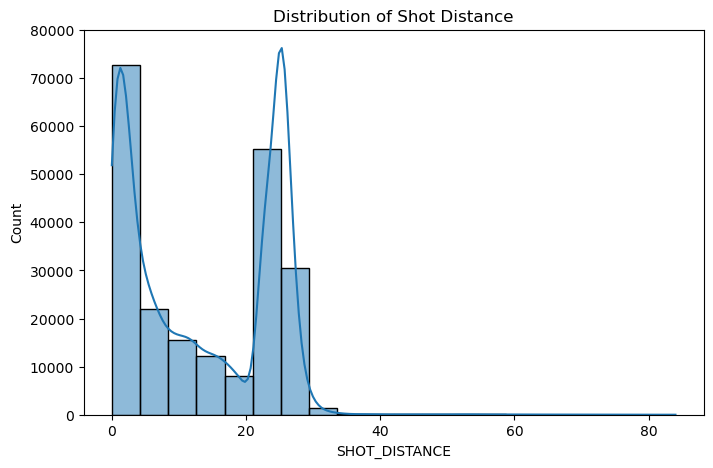

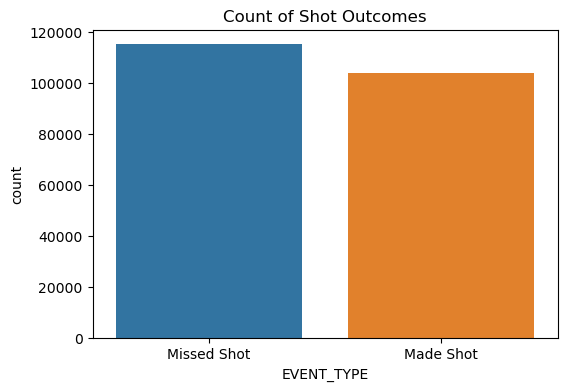

In [6]:
# Plot distribution of shot distance
plt.figure(figsize=(8, 5))
sns.histplot(nba_data['SHOT_DISTANCE'], bins=20, kde=True)
plt.title('Distribution of Shot Distance')
plt.show()

# Plot count of shot outcomes (made/missed)
plt.figure(figsize=(6, 4))
sns.countplot(data=nba_data, x='EVENT_TYPE')
plt.title('Count of Shot Outcomes')
plt.show()

In [7]:
print(nba_data.columns)

Index(['SEASON_1', 'SEASON_2', 'TEAM_ID', 'TEAM_NAME', 'PLAYER_ID',
       'PLAYER_NAME', 'POSITION_GROUP', 'POSITION', 'GAME_DATE', 'GAME_ID',
       'HOME_TEAM', 'AWAY_TEAM', 'EVENT_TYPE', 'SHOT_MADE', 'ACTION_TYPE',
       'SHOT_TYPE', 'BASIC_ZONE', 'ZONE_NAME', 'ZONE_ABB', 'ZONE_RANGE',
       'LOC_X', 'LOC_Y', 'SHOT_DISTANCE', 'QUARTER', 'MINS_LEFT', 'SECS_LEFT'],
      dtype='object')


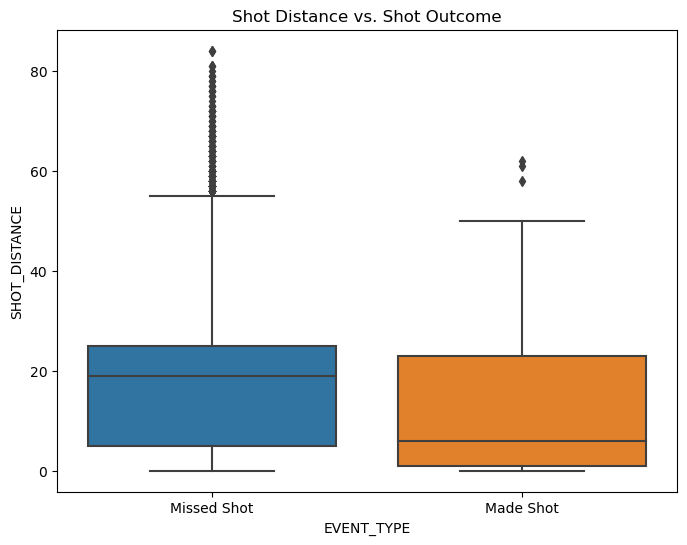

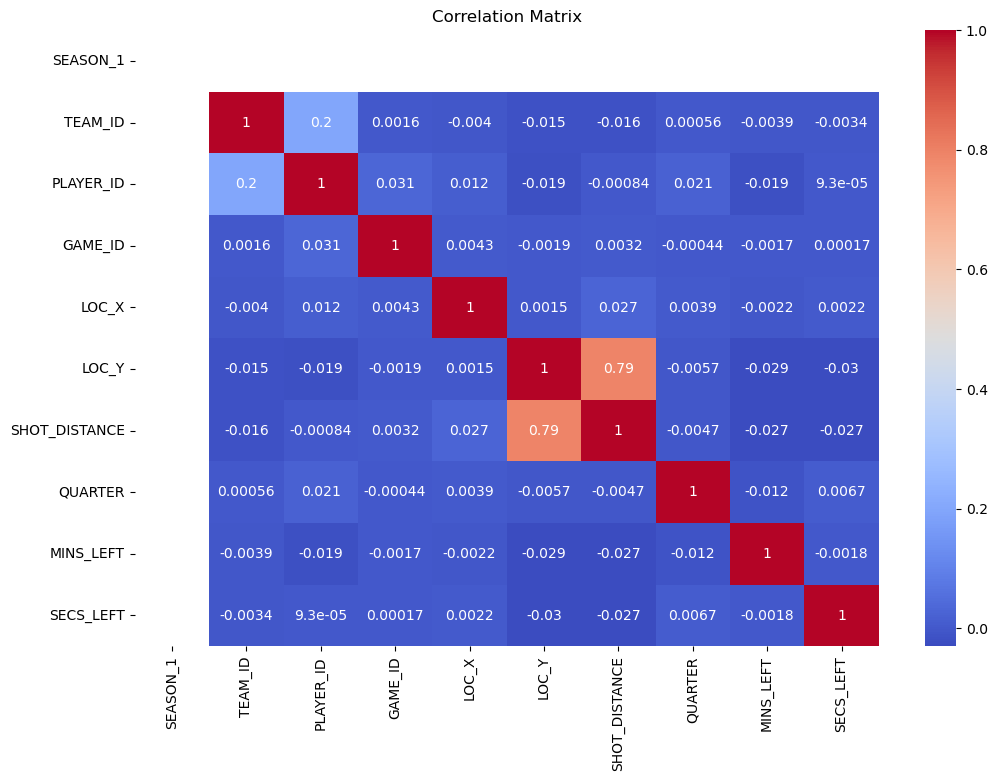

In [8]:
# Relationship between shot distance and shot outcome
plt.figure(figsize=(8, 6))
sns.boxplot(x='EVENT_TYPE', y='SHOT_DISTANCE', data=nba_data)
plt.title('Shot Distance vs. Shot Outcome')
plt.show()

# Filter the numeric columns only
numeric_data = nba_data.select_dtypes(include=['float64', 'int64'])

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [9]:
features = ['SHOT_DISTANCE']  # Replace with relevant features
target = 'EVENT_TYPE'
X = nba_data[features]
y = nba_data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model (replace with your preferred model)
model = LogisticRegression(max_iter=1000) 

model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Print the classification report   

print("Classification Report:")
print(classification_report(y_test, y_pred)) 

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

   Made Shot       0.57      0.59      0.58     20721
 Missed Shot       0.62      0.60      0.61     23020

    accuracy                           0.60     43741
   macro avg       0.60      0.60      0.60     43741
weighted avg       0.60      0.60      0.60     43741

Confusion Matrix:
[[12238  8483]
 [ 9109 13911]]


# Random Forest Model

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
def perform_eda(df):
    print("---- Basic Statistics ----")
    print(df.describe())

    print("\n---- Missing Values ----")
    print(df.isnull().sum())

    sns.countplot(x='SHOT_MADE', data=df)
    plt.title('Shot Success Distribution')
    plt.show()
    
def clean_data(df):
    df.dropna(inplace=True)
    return df

def encode_features(df, features, label_encoders=None):
    if label_encoders is None:
        label_encoders = {}

    for feature in features:
        if feature in label_encoders:
            le = label_encoders[feature]
            df[feature] = le.transform(df[feature])
        else:
            le = LabelEncoder()
            df[feature] = le.fit_transform(df[feature])
            label_encoders[feature] = le

    return df, label_encoders

def train_random_forest(X, y):
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X, y)

    return rf_model

def load_and_train_model(file_path):
    df = pd.read_csv(file_path)

    perform_eda(df.copy())

    df = clean_data(df)

    categorical_features = ['SHOT_TYPE', 'BASIC_ZONE', 'ZONE_NAME', 'PLAYER_NAME', 'TEAM_NAME']

    df, label_encoders = encode_features(df.copy(), categorical_features)

    features = ['SHOT_TYPE', 'SHOT_DISTANCE', 'LOC_X', 'LOC_Y', 'QUARTER',
                'MINS_LEFT', 'SECS_LEFT', 'BASIC_ZONE', 'ZONE_NAME',
                'PLAYER_NAME', 'TEAM_NAME']
    X = df[features]
    y = df['SHOT_MADE'].astype(int)

    model = train_random_forest(X, y)

    return model, label_encoders

def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)

    print("Classification Report:")
    print(classification_report(y_test, predictions))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, predictions))

file_path = "NBA_2024_Shots.csv"

df = pd.read_csv(file_path)

df = clean_data(df)

categorical_features = ['SHOT_TYPE', 'BASIC_ZONE', 'ZONE_NAME', 'PLAYER_NAME', 'TEAM_NAME']

df_encoded, label_encoders = encode_features(df.copy(), categorical_features)

features = ['SHOT_TYPE', 'SHOT_DISTANCE', 'LOC_X', 'LOC_Y', 'QUARTER',
            'MINS_LEFT', 'SECS_LEFT', 'BASIC_ZONE', 'ZONE_NAME',
            'PLAYER_NAME', 'TEAM_NAME']

X_train, X_test, y_train, y_test = train_test_split(df_encoded[features], df_encoded['SHOT_MADE'], test_size=0.2, random_state=42)

trained_model = train_random_forest(X_train, y_train)

y_pred = trained_model.predict(X_test)

evaluate_model(trained_model, X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

       False       0.60      0.72      0.66     22869
        True       0.60      0.46      0.52     20619

    accuracy                           0.60     43488
   macro avg       0.60      0.59      0.59     43488
weighted avg       0.60      0.60      0.59     43488


Confusion Matrix:
[[16575  6294]
 [11065  9554]]


---- Basic Statistics ----
       SEASON_1       TEAM_ID     PLAYER_ID       GAME_ID          LOC_X  \
count  218701.0  2.187010e+05  2.187010e+05  2.187010e+05  218701.000000   
mean     2024.0  1.610613e+09  1.289201e+06  2.230061e+07       0.169477   
std         0.0  8.674663e+00  6.104898e+05  3.550262e+02      11.429150   
min      2024.0  1.610613e+09  2.544000e+03  2.230000e+07     -25.000000   
25%      2024.0  1.610613e+09  1.626157e+06  2.230031e+07      -4.500000   
50%      2024.0  1.610613e+09  1.629001e+06  2.230061e+07       0.000000   
75%      2024.0  1.610613e+09  1.630245e+06  2.230092e+07       4.800000   
max      2024.0  1.610613e+09  1.642013e+06  2.230123e+07      25.000000   

               LOC_Y  SHOT_DISTANCE        QUARTER     MINS_LEFT  \
count  218701.000000  218701.000000  218701.000000  218701.00000   
mean       14.668395      13.534607       2.482686       5.37667   
std         9.454978      10.582937       1.130489       3.45106   
min         0.15

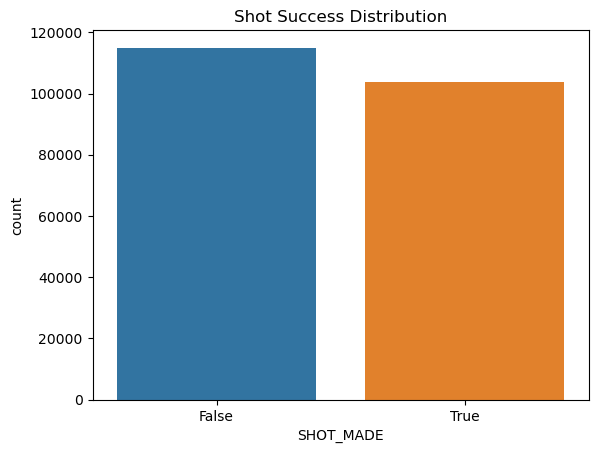

KeyError: "['PREDICTION'] not in index"

In [12]:
categorical_features = ['SHOT_TYPE', 'BASIC_ZONE', 'ZONE_NAME', 'PLAYER_NAME', 'TEAM_NAME']

df_encoded, _ = encode_features(df, categorical_features)

trained_model = load_and_train_model(file_path)

X_pred = df_encoded[features]

sample_records = df[features + ['PREDICTION']].head(5)

print(sample_records)

# Logistic Regression Model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Data Preprocessing - Perform one-hot encoding
nba_data_encoded = pd.get_dummies(nba_data, columns=['SHOT_TYPE', 'BASIC_ZONE', 'ZONE_NAME', 'POSITION', 'QUARTER'], drop_first=True)

# Step 2: Feature Engineering
# 2.1 Combine MINS_LEFT and SECS_LEFT into a single 'time_left_sec' feature
nba_data_encoded['time_left_sec'] = nba_data['MINS_LEFT'] * 60 + nba_data['SECS_LEFT']

# 2.2 Create shot distance categories
def shot_distance_category(distance):
    if distance <= 8:
        return 'Close-range'
    elif 8 < distance <= 16:
        return 'Mid-range'
    else:
        return 'Long-range'

nba_data_encoded['SHOT_DISTANCE_CAT'] = nba_data['SHOT_DISTANCE'].apply(shot_distance_category)

# Apply one-hot encoding to the new 'SHOT_DISTANCE_CAT' feature
nba_data_encoded = pd.get_dummies(nba_data_encoded, columns=['SHOT_DISTANCE_CAT'], drop_first=True)

# 2.3 Create an interaction term between LOC_X, LOC_Y, and SHOT_DISTANCE
nba_data_encoded['LOC_X_SHOT_DISTANCE'] = nba_data['LOC_X'] * nba_data['SHOT_DISTANCE']
nba_data_encoded['LOC_Y_SHOT_DISTANCE'] = nba_data['LOC_Y'] * nba_data['SHOT_DISTANCE']

# Step 3: Feature Selection
X = nba_data_encoded[['SHOT_DISTANCE', 'LOC_X', 'LOC_Y', 
                      'QUARTER_2', 'SHOT_TYPE_3PT Field Goal', 'BASIC_ZONE_In The Paint (Non-RA)', 
                      'time_left_sec', 'SHOT_DISTANCE_CAT_Mid-range', 'SHOT_DISTANCE_CAT_Long-range',
                      'LOC_X_SHOT_DISTANCE', 'LOC_Y_SHOT_DISTANCE']]  # Add your relevant features

y = nba_data['SHOT_MADE']  # Target variable

# Step 4: Address Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 5: Train-test split with cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Standard scaling
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Step 6: Logistic Regression Model with Hyperparameter Tuning
log_reg = LogisticRegression(solver='liblinear')

# Define hyperparameter grid for tuning
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(log_reg, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_resampled_scaled, y_resampled)

# Step 7: Best Model Evaluation
best_model = grid_search.best_estimator_

# Split the original data into training and test sets for final evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the test data
X_test_scaled = scaler.transform(X_test)

# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)

# Step 8: Evaluation Metrics
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 9: Visualize the Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Improved Confusion Matrix with Feature Engineering')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()